In [38]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

pd.options.display.max_columns = 200

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = pd.concat([df_train, df_test], axis=0)

In [39]:
learning_rate_for_tsne = 200
init_for_tsne='pca'

In [40]:
df['Category'] = df['Category'].replace([0,1], ['dislike', 'like'])
df['Category'] = df['Category'].fillna('No_info')

In [41]:
df['Category'].value_counts()

like       351
dislike    314
No_info    300
Name: Category, dtype: int64

In [42]:
df.isna().sum()

Id                  0
Category            0
Artists             1
Track               0
Version           836
Duration            0
Artists_Genres      0
Album               2
Release_year        0
Album_type        753
Labels              6
Key                 0
BPM                 0
Vocal               1
Country            12
Energy              1
Dancebility         1
Happiness           1
dtype: int64

In [43]:
df['Version'].value_counts()

Soundtrack     48
Radio Edit     36
Remaster       33
Single Edit     7
Remix           5
Name: Version, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df["Version"] = df["Version"].fillna("N")
versions = set(df["Version"])
df[list(versions)] = OneHotEncoder().fit_transform(df[["Version"]]).toarray()
df = df.drop(["Version","N"], axis=1)

In [45]:
df['Album_type'].value_counts()

single         167
compilation     45
Name: Album_type, dtype: int64

In [46]:
df["Album_type"] = df["Album_type"].fillna("N")
album_types = set(df["Album_type"])
df[list(album_types)] = OneHotEncoder().fit_transform(df[["Album_type"]]).toarray()
df = df.drop(["Album_type","N"], axis=1)

In [47]:
df.head()

,Id,Category,Artists,Track,Duration,Artists_Genres,Album,Release_year,Labels,Key,BPM,Vocal,Country,Energy,Dancebility,Happiness,Remaster,Single Edit,Radio Edit,Soundtrack,Remix,single,compilation
0,0,dislike,Avatar,Hail the Apocalypse,253660,metal,Hail the Apocalypse,2014,Gain,F# Major,93,M,SWE,99.0,42.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,like,Céline Dion,My Heart Will Go On,284150,soundtrack|classical|pop,My Love Ultimate Essential Collection,2019,Sony Music Entertainment Canada,E Major,99,F,CA,28.0,43.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,like,Adele,Skyfall,286480,pop,Skyfall,2012,Melted Stone|Skyfall|Columbia,C Minor,76,F,GB,55.0,35.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,like,Kiss,I Was Made for Lovin' You,268440,hardrock|rock|foreignrap,KISS Box Set,2001,The Island Def Jam,E Major,128,M,USA,85.0,77.0,87.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,dislike,Kanye West,Stronger,311420,foreignrap,Graduation,2007,A Roc-A-Fella Records release,B♭ Minor,104,M,USA,72.0,62.0,49.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df[df['Country'].isna()]

,Id,Category,Artists,Track,Duration,Artists_Genres,Album,Release_year,Labels,Key,BPM,Vocal,Country,Energy,Dancebility,Happiness,Remaster,Single Edit,Radio Edit,Soundtrack,Remix,single,compilation
30,30,dislike,Sub Focus|Alex Clare|Fred V|Grafix|N Douwma,Endorphins,275330,pop|dance|dnb|rock|electronics,UKF Drum & Bass 2013,2013,UKF,B Minor,174,M,NaN,86.0,47.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
155,155,dislike,Monoir|Eneli,3 to 1,219500,pop|house|electronics|dance,3 to 1,2020,Warner Music Russia,B Minor,108,F,NaN,58.0,90.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
520,520,dislike,DJ Marky|Stamina MC|XRS|Stamina MC Carol Carol...,LK Feat. Stamina MC (Carol Carolina Bela),329750,foreignrap|dance|electronics|dnb,In Rotation,2004,Innerground,A♭ Minor,174,M,NaN,93.0,65.0,97.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
575,575,dislike,System of A Down,ATWA,176200,numetal|rock|alternative,Toxicity,2001,Sony Music Entertainment. With American,F Minor,87,M,NaN,79.0,38.0,37.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
621,621,like,Sergei Prokofiev|Orchestre Symphonique de Mont...,"Romeo and Juliet Op. 64, ACT 1: The Knights' D...",237050,classical,Legend of the Orchestra,2009,Warner Classics|Erato,E Minor,95,N,NaN,10.0,19.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
625,625,dislike,Minelli,Rampampam,200210,pop|electronics|dance,Rampampam,2021,Global,E♭ Minor,118,F,NaN,65.0,80.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
661,661,dislike,NaN,"La Traviata - Opera in three acts, Act I: Libi...",182000,|classical|vocal,Verdi: La Traviata,2017,EMI Records Ltd. Digital remastering,B♭ Minor,69,N,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0
0,665,No_info,Itzhak Perlman|Никколо Паганини,"24 Caprices, Op.1: No. 24 in A Minor",265600,classicalmasterpieces|films|folk|classical,Paganini: 24 Caprices,2000,EMI,A Minor,90,N,NaN,38.0,38.0,91.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18,683,No_info,Used Somebody|Somebody That I Used To Know,Somebody That I Used to Know,245580,pop,Somebody That I Used to Know,2012,Fiesta Records (Andreas Rosmiarek) LC-Nr.:|Oli...,C Major,129,M,NaN,50.0,86.0,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
86,751,No_info,KALEO,Way Down We Go,213700,indie|rock|alternative,A/B,2016,Elektra,B♭ Minor,163,M,NaN,50.0,49.0,34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
df['Country'] = df['Country'].fillna('No_info')

In [50]:
df.isna().sum()

Id                0
Category          0
Artists           1
Track             0
Duration          0
Artists_Genres    0
Album             2
Release_year      0
Labels            6
Key               0
BPM               0
Vocal             1
Country           0
Energy            1
Dancebility       1
Happiness         1
Remaster          0
Single Edit       0
Radio Edit        0
Soundtrack        0
Remix             0
single            0
compilation       0
dtype: int64

In [51]:
df[df['Vocal '].isna()]

,Id,Category,Artists,Track,Duration,Artists_Genres,Album,Release_year,Labels,Key,BPM,Vocal,Country,Energy,Dancebility,Happiness,Remaster,Single Edit,Radio Edit,Soundtrack,Remix,single,compilation
72,737,No_info,Flux Pavilion,I Can't Stop,305780,electronics|dance|dubstep,Big Beat Dance Hits: Vol 1,2015,Big Beat,C Minor,140,NaN,GB,60.0,52.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
df['Vocal '].value_counts()

M      706
F      171
F|M     76
N       11
Name: Vocal , dtype: int64

In [53]:
df['Vocal '] = df['Vocal '].fillna('N')

In [54]:
df[df['Album'].isna()]

,Id,Category,Artists,Track,Duration,Artists_Genres,Album,Release_year,Labels,Key,BPM,Vocal,Country,Energy,Dancebility,Happiness,Remaster,Single Edit,Radio Edit,Soundtrack,Remix,single,compilation
250,250,dislike,Martin Solveig|Dragonette,Hello,191620,dance|electronics|pop|pop|dance|electronics,NaN,2010,NaN,E♭ Major,128,M,CA|SWE,98.0,67.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
501,501,like,The Notorious B.I.G.,Big Poppa,252920,foreignrap|rnb|dance,NaN,1995,NaN,A Minor,84,M,USA,57.0,78.0,77.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
df['Album'] = df['Album'].fillna('No_info')
df['Labels'] = df['Labels'].fillna('No_info')

In [56]:
df.isna().sum()

Id                0
Category          0
Artists           1
Track             0
Duration          0
Artists_Genres    0
Album             0
Release_year      0
Labels            0
Key               0
BPM               0
Vocal             0
Country           0
Energy            1
Dancebility       1
Happiness         1
Remaster          0
Single Edit       0
Radio Edit        0
Soundtrack        0
Remix             0
single            0
compilation       0
dtype: int64

In [57]:
df[df['Artists'].isna()]

,Id,Category,Artists,Track,Duration,Artists_Genres,Album,Release_year,Labels,Key,BPM,Vocal,Country,Energy,Dancebility,Happiness,Remaster,Single Edit,Radio Edit,Soundtrack,Remix,single,compilation
661,661,dislike,NaN,"La Traviata - Opera in three acts, Act I: Libi...",182000,|classical|vocal,Verdi: La Traviata,2017,EMI Records Ltd. Digital remastering,B♭ Minor,69,N,No_info,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
df.dropna(inplace=True)

In [59]:
df.drop('Track', axis=1, inplace=True)

In [60]:
artists = set()
alist = []
for i in df['Artists']:
    for j in i.split('|'):
        artists.add(j)
        alist.append(j)

In [61]:
len(artists)

532

In [62]:
in_train, in_test = [], []
for i in df.loc[df['Category'] != 'No_info', 'Artists']:
    in_train.extend(i.split("|"))
for i in df.loc[df['Category'] == 'No_info', 'Artists']:
    in_test.extend(i.split("|"))
    
only_test = set(in_test) - set(in_train)
only_train = set(in_train) - set(in_test)
display(len(only_test))
display(len(only_train))

133

293

In [63]:
artists = list(artists - only_test - only_train)
print(len(artists))

106


In [64]:
artists_for_tsne = []
df['Other_artists'] = 1
for i in artists:
    if alist.count(i) > 1:
        df[i] = 0
        df.loc[(df['Artists'].str.contains(i)), i] = 1
        artists_for_tsne.append(i)
for i in artists_for_tsne:
    df.loc[(df['Artists'].str.contains(i)), 'Other_artists'] = 0

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4028\3502342003.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = 0
C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4028\3502342003.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = 0
C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4028\3502342003.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [65]:
df['Other_artists'].value_counts()

0    644
1    320
Name: Other_artists, dtype: int64

In [66]:
len(artists_for_tsne)

106

In [67]:
m = TSNE(learning_rate=learning_rate_for_tsne, init=init_for_tsne)
tsne_features = m.fit_transform(df.loc[:, artists_for_tsne])


D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [68]:
df['Artists_tsne_x'] = tsne_features[:, 0]
df['Artists_tsne_y'] = tsne_features[:, 1]

<function matplotlib.pyplot.show(close=None, block=None)>

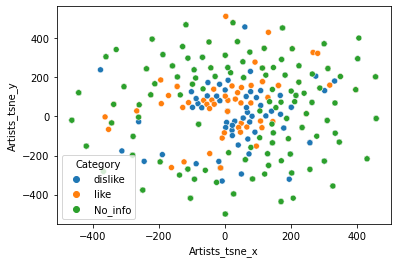

In [70]:
sns.scatterplot(x='Artists_tsne_x', y='Artists_tsne_y', hue='Category', data=df)
plt.show

In [71]:
df.drop(artists_for_tsne, axis=1, inplace=True)
df.drop('Artists', axis=1, inplace=True)

In [72]:
#same tsne for genres
genres = set()
glist = []
for i in df['Artists_Genres']:
    for j in i.split('|'):
        genres.add(j)
        glist.append(j)
in_train, in_test = [], []
for i in df.loc[df['Category'] != 'No_info', 'Artists_Genres']:
    in_train.extend(i.split("|"))
for i in df.loc[df['Category'] == 'No_info', 'Artists_Genres']:
    in_test.extend(i.split("|"))
    
only_test = set(in_test) - set(in_train)
only_train = set(in_train) - set(in_test)
genres = list(genres - only_test - only_train)
genres_for_tsne = []
for i in genres:
    if glist.count(i) > 1:
        df[i] = 0
        df.loc[(df['Artists_Genres'].str.contains(i)), i] = 1
        genres_for_tsne.append(i)
m = TSNE(learning_rate=learning_rate_for_tsne, init=init_for_tsne)
tsne_features_2 = m.fit_transform(df.loc[:, genres_for_tsne])
df['Genres_tsne_x'] = tsne_features_2[:, 0]
df['Genres_tsne_y'] = tsne_features_2[:, 1]
df.drop(genres_for_tsne, axis=1, inplace=True)
df.drop('Artists_Genres', axis=1, inplace=True)

D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

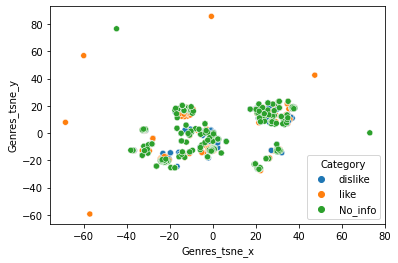

In [80]:
sns.scatterplot(x='Genres_tsne_x', y='Genres_tsne_y', hue='Category', data=df)
plt.show

In [81]:
#same tsne for albums
albums = set()
alblist = []
for i in df['Album']:
    for j in i.split('|'):
        albums.add(j)
        alblist.append(j)
in_train, in_test = [], []
for i in df.loc[df['Category'] != 'No_info', 'Album']:
    in_train.extend(i.split("|"))
for i in df.loc[df['Category'] == 'No_info', 'Album']:
    in_test.extend(i.split("|"))
    
only_test = set(in_test) - set(in_train)
only_train = set(in_train) - set(in_test)
albums = list(albums - only_test - only_train)
albums_for_tsne = []
for i in albums:
    if alblist.count(i) > 1:
        df[i] = 0
        df.loc[(df['Album'].str.contains(i)), i] = 1
        albums_for_tsne.append(i)
m = TSNE(learning_rate=learning_rate_for_tsne, init=init_for_tsne)
tsne_features_3 = m.fit_transform(df.loc[:, albums_for_tsne])
df['Albums_tsne_x'] = tsne_features_3[:, 0]
df['Albums_tsne_y'] = tsne_features_3[:, 1]
df.drop(albums_for_tsne, axis=1, inplace=True)
df.drop('Album', axis=1, inplace=True)

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4028\2505371431.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[(df['Album'].str.contains(i)), i] = 1
D:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

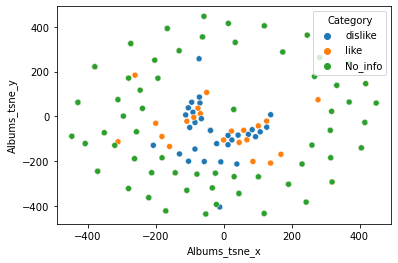

In [82]:
sns.scatterplot(x='Albums_tsne_x', y='Albums_tsne_y', hue='Category', data=df)
plt.show

<AxesSubplot:xlabel='Id', ylabel='Release_year'>

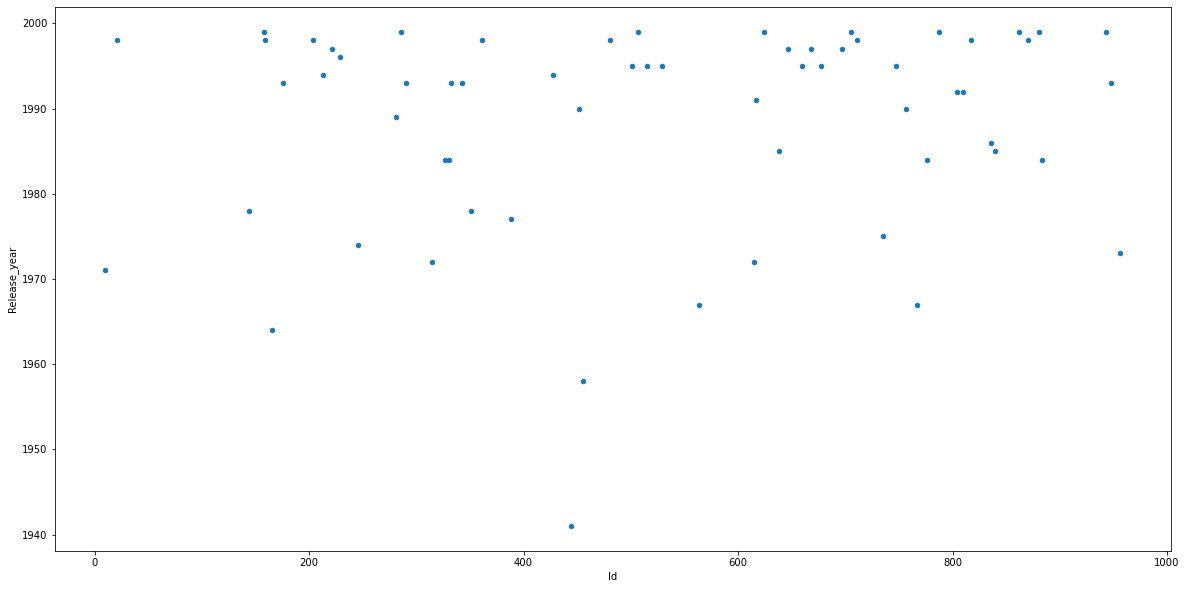

In [83]:
df[df['Release_year']<2000][['Id','Release_year']].plot(kind='scatter', x='Id', y='Release_year',figsize=(20,10))

In [84]:
df.loc[:,"Release_decade"] = (df.loc[:,"Release_year"]//10 * 10)
df.loc[df.loc[:,"Release_decade"]<1990,"Release_decade"] = 1980

In [85]:
#same tsne for labels
labels = set()
lablist = []
for i in df['Labels']:
    for j in i.split('|'):
        labels.add(j)
        lablist.append(j)
in_train, in_test = [], []
for i in df.loc[df['Category'] != 'No_info', 'Labels']:
    in_train.extend(i.split("|"))
for i in df.loc[df['Category'] == 'No_info', 'Labels']:
    in_test.extend(i.split("|"))
    
only_test = set(in_test) - set(in_train)
only_train = set(in_train) - set(in_test)
labels = list(labels - only_test - only_train)
labels_for_tsne = []
for i in labels:
    if lablist.count(i) > 1:
        df[i] = 0
        df.loc[(df['Labels'].str.contains(i)), i] = 1
        labels_for_tsne.append(i)
m = TSNE(learning_rate=learning_rate_for_tsne, init=init_for_tsne)
tsne_features_4 = m.fit_transform(df.loc[:, labels_for_tsne])
df['Labels_tsne_x'] = tsne_features_4[:, 0]
df['Labels_tsne_y'] = tsne_features_4[:, 1]
df.drop(labels_for_tsne, axis=1, inplace=True)
df.drop('Labels', axis=1, inplace=True)

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4028\1706197123.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[(df['Labels'].str.contains(i)), i] = 1
C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4028\1706197123.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = 0
C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4028\1706197123.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[(df['Labels'].str.contains(i)), i] = 1
C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4028\1706197123.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usua

<function matplotlib.pyplot.show(close=None, block=None)>

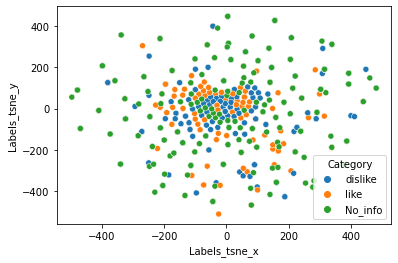

In [86]:
sns.scatterplot(x='Labels_tsne_x', y='Labels_tsne_y', hue='Category', data=df)
plt.show

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

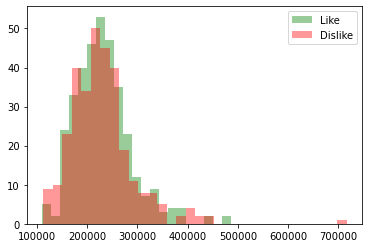

In [38]:
liked = list(df[df['Category'] == 'like']['Duration'])
disliked = list(df[df['Category'] == 'dislike']['Duration'])
sns.distplot(liked, color='g', kde=False)
sns.distplot(disliked, color='r', kde=False)
plt.legend(['Like', 'Dislike'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

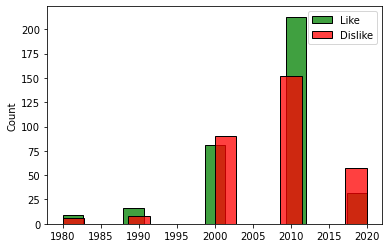

In [39]:
liked = list(df[df['Category'] == 'like']['Release_decade'])
disliked = list(df[df['Category'] == 'dislike']['Release_decade'])
sns.histplot(liked, color='g', kde=False)
sns.histplot(disliked, color='r', kde=False)
plt.legend(['Like', 'Dislike'])
plt.show

In [40]:
countries = set()
clist = []
for i in df['Country']:
    for j in i.split('|'):
        countries.add(j)
        clist.append(j)
in_train, in_test = [], []
for i in df.loc[df['Category'] != 'No_info', 'Country']:
    in_train.extend(i.split("|"))
for i in df.loc[df['Category'] == 'No_info', 'Country']:
    in_test.extend(i.split("|"))
    
only_test = set(in_test) - set(in_train)
only_train = set(in_train) - set(in_test)
countries = list(countries - only_test - only_train)
for i in countries:
    if clist.count(i) > 1:
        df[i] = 0
        df.loc[(df['Country'].str.contains(i)), i] = 1

df.drop('Country', axis=1, inplace=True)

In [41]:
df.head()

,Id,Category,Duration,Release_year,Key,BPM,Vocal,Energy,Dancebility,Happiness,Radio Edit,Remaster,Remix,Single Edit,Soundtrack,single,compilation,Other_artists,Artists_tsne_x,Artists_tsne_y,Genres_tsne_x,Genres_tsne_y,Albums_tsne_x,Albums_tsne_y,Release_decade,Labels_tsne_x,Labels_tsne_y,KZ,DK,COL,No_info,USA,UA,GB,CA,AU,RUS,BAR,FR,KR,SWE,JM
0,0,dislike,253660,2014,F# Major,93,M,99.0,42.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,162.260635,9.238750,-11.745326,3.141928,-194.640579,-94.969101,2010,13.748683,112.125389,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,like,284150,2019,E Major,99,F,28.0,43.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,-48.781334,-89.775490,-1.363448,-9.852091,121.751213,-192.292145,2010,-200.836182,387.058960,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,like,286480,2012,C Minor,76,F,55.0,35.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,17.478596,-189.959702,-5.177856,-11.664622,63.640911,-208.237701,2010,-186.356812,86.714607,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,like,268440,2001,E Major,128,M,85.0,77.0,87.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,25.275446,62.750996,3.427704,84.675621,-86.844742,-208.727554,2000,480.931000,-37.533569,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,dislike,311420,2007,B♭ Minor,104,M,72.0,62.0,49.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-208.548386,129.799515,31.657103,2.938137,13.957136,23.960255,2000,57.230453,-25.128155,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [42]:
df['Key'].value_counts()

C Major     74
D Major     66
B Minor     64
D♭ Major    63
G Major     63
A Minor     60
E Minor     57
F# Minor    49
B♭ Minor    48
A♭ Major    44
D♭ Minor    44
F Minor     41
F Major     38
A Major     38
B Major     30
F# Major    28
C Minor     28
G Minor     27
B♭ Major    22
E Major     21
D Minor     20
A♭ Minor    20
E♭ Major    10
E♭ Minor     8
C# Minor     1
Name: Key, dtype: int64

In [43]:
df['is_Major'] = 0
df.loc[(df['Key'].str.contains('Major')), 'is_Major'] = 1

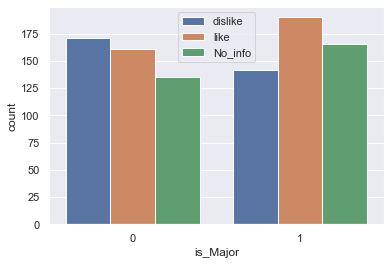

In [44]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="is_Major", hue="Category", data=df)
plt.legend(loc='upper center')

In [45]:
df['Key'] = df['Key'].map(lambda x: x.replace(' Major', ''))
df['Key'] = df['Key'].map(lambda x: x.replace(' Minor', ''))

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9837 (\N{MUSIC FLAT SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


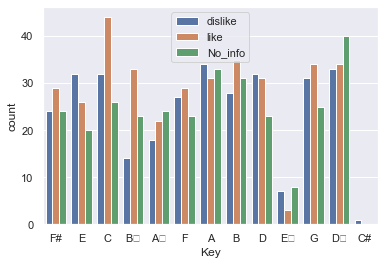

In [46]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Key", hue="Category", data=df)
plt.legend(loc='upper center')

In [47]:
df['Key'].value_counts()

D♭    107
C     102
A      98
B      94
G      90
D      86
F      79
E      78
F#     77
B♭     70
A♭     64
E♭     18
C#      1
Name: Key, dtype: int64

In [48]:
df.loc[:,"Key"] = df["Key"].replace({"D♭": "C#", "E♭": "D#", "G♭": "F#", "A♭": "G#","B♭":"A#"})

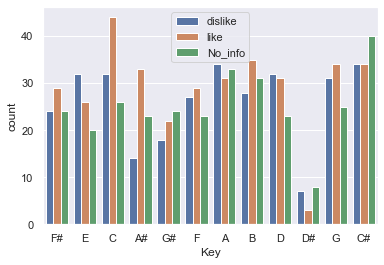

In [49]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Key", hue="Category", data=df)
plt.legend(loc='upper center')

In [50]:
from sklearn.preprocessing import OneHotEncoder

df[df['Key'].unique()] = OneHotEncoder().fit_transform(df[["Key"]]).toarray()


In [51]:
df = df.drop("Key", axis=1)

In [52]:
df[['Dancebility', 'Happiness', 'Energy']].describe()

,Dancebility,Happiness,Energy
count,964.000000,964.000000,964.000000
mean,63.454357,50.268672,68.751037
std,16.420202,23.482333,19.162589
min,15.000000,4.000000,2.000000
25%,52.750000,32.000000,56.000000
50%,65.000000,51.000000,71.000000
75%,76.000000,68.000000,83.000000
max,97.000000,99.000000,100.000000


In [53]:
df[['Energy%', 'Happiness%', 'Dancebility%']] = df[['Energy', 'Happiness', 'Dancebility']].apply(lambda x: x/sum(x), axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

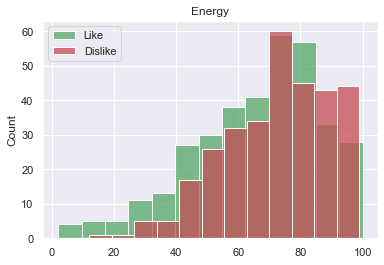

In [54]:
liked = list(df[df['Category'] == 'like']['Energy'])
disliked = list(df[df['Category'] == 'dislike']['Energy'])
sns.histplot(liked, color='g', kde=False)
sns.histplot(disliked, color='r', kde=False)
plt.legend(['Like', 'Dislike'])
plt.title('Energy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

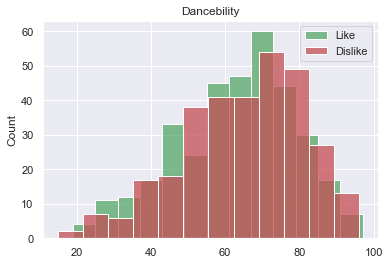

In [55]:
liked = list(df[df['Category'] == 'like']['Dancebility'])
disliked = list(df[df['Category'] == 'dislike']['Dancebility'])
sns.histplot(liked, color='g', kde=False)
sns.histplot(disliked, color='r', kde=False)
plt.legend(['Like', 'Dislike'])
plt.title('Dancebility')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

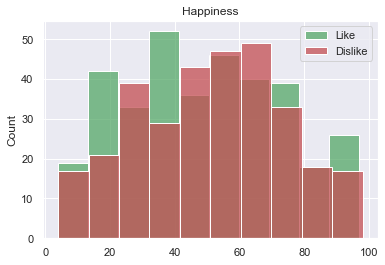

In [56]:
liked = list(df[df['Category'] == 'like']['Happiness'])
disliked = list(df[df['Category'] == 'dislike']['Happiness'])
sns.histplot(liked, color='g', kde=False)
sns.histplot(disliked, color='r', kde=False)
plt.legend(['Like', 'Dislike'])
plt.title('Happiness')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

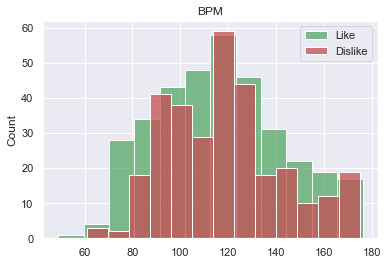

In [57]:
liked = list(df[df['Category'] == 'like']['BPM'])
disliked = list(df[df['Category'] == 'dislike']['BPM'])
sns.histplot(liked, color='g', kde=False)
sns.histplot(disliked, color='r', kde=False)
plt.legend(['Like', 'Dislike'])
plt.title('BPM')
plt.show

In [58]:
df['Vocal '].value_counts()

M      706
F      171
F|M     76
N       11
Name: Vocal , dtype: int64

In [59]:
df['Male_vocal'] = 0
df['Female_vocal'] = 0
df.loc[(df['Vocal '].str.contains('M')), 'Male_vocal'] = 1
df.loc[(df['Vocal '].str.contains('F')), 'Female_vocal'] = 1

In [60]:
df.drop('Vocal ', axis=1, inplace=True)

In [61]:
df.drop('Id', axis=1, inplace=True)

In [62]:
df['Category'] = df['Category'].replace(['like', 'dislike', 'No_info'], [1, 0, ''])

In [63]:
df['Category'].value_counts()

1    351
0    313
     300
Name: Category, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 299
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        964 non-null    object 
 1   Duration        964 non-null    int64  
 2   Release_year    964 non-null    int64  
 3   BPM             964 non-null    int64  
 4   Energy          964 non-null    float64
 5   Dancebility     964 non-null    float64
 6   Happiness       964 non-null    float64
 7   Radio Edit      964 non-null    float64
 8   Remaster        964 non-null    float64
 9   Remix           964 non-null    float64
 10  Single Edit     964 non-null    float64
 11  Soundtrack      964 non-null    float64
 12  single          964 non-null    float64
 13  compilation     964 non-null    float64
 14  Other_artists   964 non-null    int64  
 15  Artists_tsne_x  964 non-null    float32
 16  Artists_tsne_y  964 non-null    float32
 17  Genres_tsne_x   964 non-null    flo

In [65]:
df.head()

,Category,Duration,Release_year,BPM,Energy,Dancebility,Happiness,Radio Edit,Remaster,Remix,Single Edit,Soundtrack,single,compilation,Other_artists,Artists_tsne_x,Artists_tsne_y,Genres_tsne_x,Genres_tsne_y,Albums_tsne_x,Albums_tsne_y,Release_decade,Labels_tsne_x,Labels_tsne_y,KZ,DK,COL,No_info,USA,UA,GB,CA,AU,RUS,BAR,FR,KR,SWE,JM,is_Major,F#,E,C,A#,G#,F,A,B,D,D#,G,C#,Energy%,Happiness%,Dancebility%,Male_vocal,Female_vocal
0,0,253660,2014,93,99.0,42.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,162.260635,9.238750,-11.745326,3.141928,-194.640579,-94.969101,2010,13.748683,112.125389,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.578947,0.175439,0.245614,1,0
1,1,284150,2019,99,28.0,43.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,-48.781334,-89.775490,-1.363448,-9.852091,121.751213,-192.292145,2010,-200.836182,387.058960,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.373333,0.053333,0.573333,0,1
2,1,286480,2012,76,55.0,35.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,17.478596,-189.959702,-5.177856,-11.664622,63.640911,-208.237701,2010,-186.356812,86.714607,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561224,0.081633,0.357143,0,1
3,1,268440,2001,128,85.0,77.0,87.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,25.275446,62.750996,3.427704,84.675621,-86.844742,-208.727554,2000,480.931000,-37.533569,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.341365,0.349398,0.309237,1,0
4,0,311420,2007,104,72.0,62.0,49.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-208.548386,129.799515,31.657103,2.938137,13.957136,23.960255,2000,57.230453,-25.128155,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.393443,0.267760,0.338798,1,0


In [66]:
df.shape

(964, 57)

In [67]:
df.drop(['Release_year', 'BPM'], axis=1, inplace=True)

In [68]:
train_data = df.iloc[:-300, df.columns != 'Category']

In [69]:
train_target = df.iloc[:-300, df.columns == 'Category']

In [70]:
test_data = df.iloc[-300:, df.columns != 'Category']

In [71]:
train_target=train_target.astype('int')

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = pd.DataFrame(data=scaler.transform(train_data))
test_data = pd.DataFrame(data=scaler.transform(test_data))

In [73]:
train_data = train_data.values
train_target = train_target.values
test_data = test_data.values

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_data,train_target,test_size=0.1,random_state=1133, shuffle=False)

In [78]:
from deepforest import CascadeForestClassifier

model=CascadeForestClassifier(random_state=2,n_trees=54)
model.fit(X_train,Y_train)

[2022-05-16 14:56:56.907] Start to fit the model:
[2022-05-16 14:56:56.927] Fitting cascade layer = 0 


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2022-05-16 14:56:57.666] layer = 0  | Val Acc = 63.652 % | Elapsed = 0.739 s
[2022-05-16 14:56:57.669] Fitting cascade layer = 1 
[2022-05-16 14:56:58.395] layer = 1  | Val Acc = 62.982 % | Elapsed = 0.726 s
[2022-05-16 14:56:58.396] Early stopping counter: 1 out of 2
[2022-05-16 14:56:58.398] Fitting cascade layer = 2 
[2022-05-16 14:56:59.132] layer = 2  | Val Acc = 61.977 % | Elapsed = 0.733 s
[2022-05-16 14:56:59.133] Early stopping counter: 2 out of 2
[2022-05-16 14:56:59.133] Handling early stopping
[2022-05-16 14:56:59.133] The optimal number of layers: 1


In [79]:
y_pred=model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy with MLPClassifier: ', accuracy)

[2022-05-16 14:56:59.143] Start to evalute the model:
[2022-05-16 14:56:59.144] Evaluating cascade layer = 0 
Accuracy with MLPClassifier:  0.7164179104477612


In [93]:
pred_answer = model.predict(test_data)

[2022-05-16 15:31:12.552] Start to evalute the model:
[2022-05-16 15:31:12.553] Evaluating cascade layer = 0 


In [94]:
subm=pd.read_csv('sample_submition.csv')

In [95]:
subm.Category = pred_answer

In [96]:
subm.to_csv('submission.csv',index=False)